In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("airline_passenger_satisfaction.csv",index_col=0)

In [3]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
df.shape

(25976, 24)

# Finding the numerical and categorical features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

# Checking for missing values

In [6]:
df.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

# Filling out the missing values


<AxesSubplot:ylabel='Arrival Delay in Minutes'>

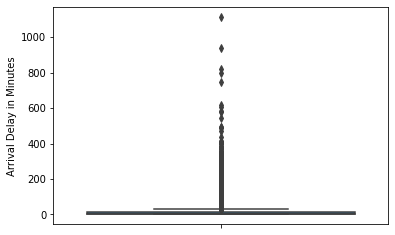

In [7]:
sns.boxplot(y=df['Arrival Delay in Minutes'])

Since, there are outliers in arrival delay feature. Will replace the missing values with median.


In [8]:
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median(),inplace=True)

In [9]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(25976, 24)

In [12]:
df.drop(columns='id',inplace=True) # Since id is not important for analysis, it's best to remove the column.

In [13]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


# Univariate Analysis

In [14]:
df['Gender'].value_counts()

Female    13172
Male      12804
Name: Gender, dtype: int64

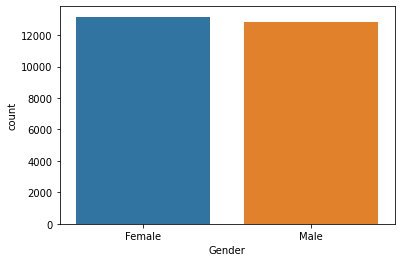

In [15]:
sns.countplot(df['Gender']);

In [16]:
df['Customer Type'].value_counts()

Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64

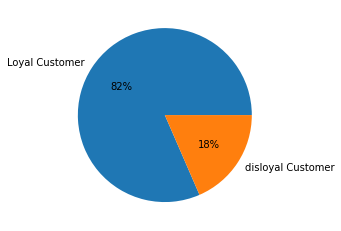

In [17]:
plt.pie(df['Customer Type'].value_counts(),labels=['Loyal Customer','disloyal Customer'],autopct='%.0f%%');

In [18]:
df['Type of Travel'].value_counts()

Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64

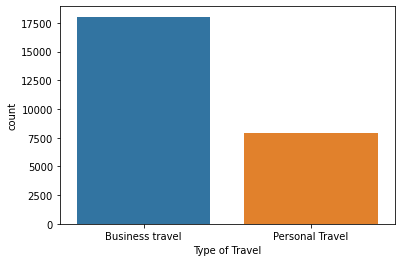

In [19]:
sns.countplot(df['Type of Travel']);

In [20]:
df['satisfaction'].value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

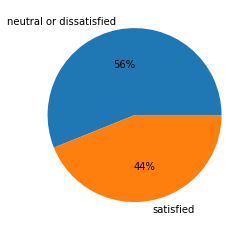

In [21]:
plt.pie(df['satisfaction'].value_counts(),labels=['neutral or dissatisfied','satisfied'],autopct='%.0f%%');

 From the above chart, More Number of people are dissatisfied with the journey, although the margin is not good.

In [22]:
df['Class'].value_counts()

Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64

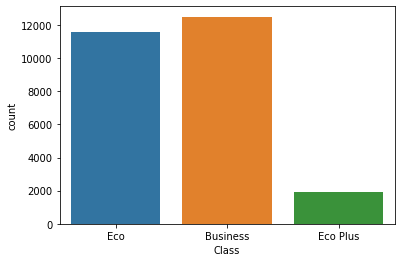

In [23]:
sns.countplot(df['Class']);

# Bi-Variate Analysis

In [24]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [25]:
df.groupby('Gender')['Customer Type'].value_counts()

Gender  Customer Type    
Female  Loyal Customer       10598
        disloyal Customer     2574
Male    Loyal Customer       10579
        disloyal Customer     2225
Name: Customer Type, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

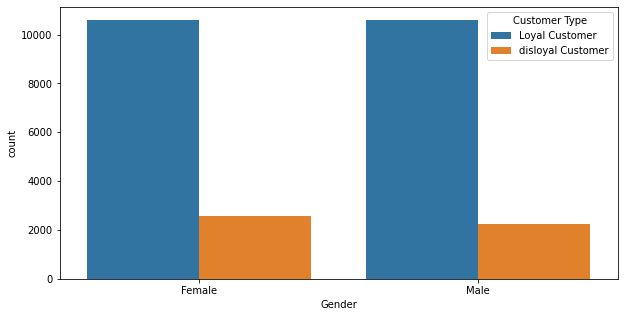

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['Gender'],hue=df['Customer Type'])

In [27]:
travel_class = df.groupby('Type of Travel')['Class'].value_counts()
travel_class

Type of Travel   Class   
Business travel  Business    11979
                 Eco          5047
                 Eco Plus     1012
Personal Travel  Eco          6517
                 Eco Plus      905
                 Business      516
Name: Class, dtype: int64

array([<AxesSubplot:ylabel='Class'>], dtype=object)

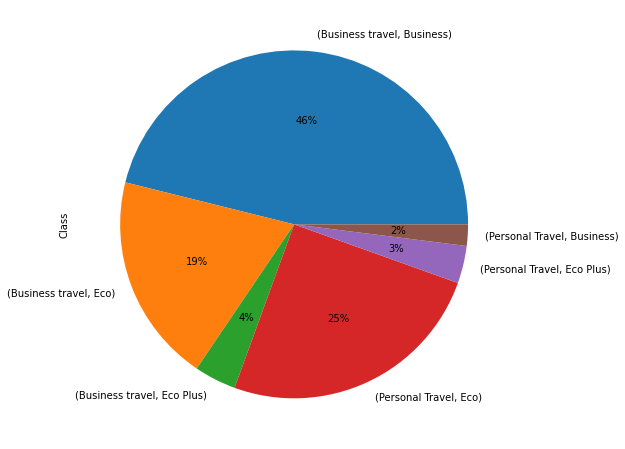

In [28]:
travel_class.plot.pie(subplots=True,autopct='%.0f%%',figsize=(15,8))

In [29]:
df.groupby('satisfaction')['Customer Type'].value_counts()

satisfaction             Customer Type    
neutral or dissatisfied  Loyal Customer       10982
                         disloyal Customer     3591
satisfied                Loyal Customer       10195
                         disloyal Customer     1208
Name: Customer Type, dtype: int64

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

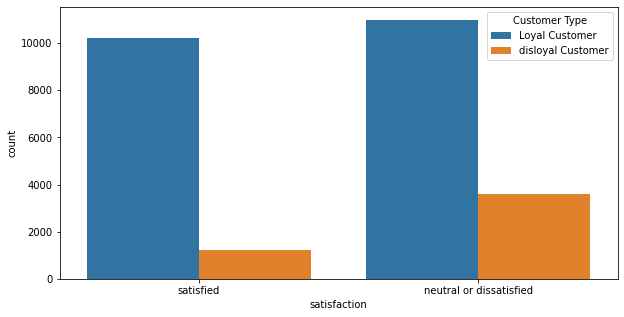

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(df['satisfaction'],hue=df['Customer Type'])

From the Above Plot, The no of first time customers who are satisfied with their travel is very less.

In [31]:
df.groupby('Age')['satisfaction'].value_counts()

Age  satisfaction           
7    neutral or dissatisfied    114
     satisfied                    9
8    neutral or dissatisfied    145
     satisfied                   12
9    neutral or dissatisfied    137
                               ... 
79   satisfied                    2
80   neutral or dissatisfied     16
     satisfied                   16
85   neutral or dissatisfied      5
     satisfied                    3
Name: satisfaction, Length: 150, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

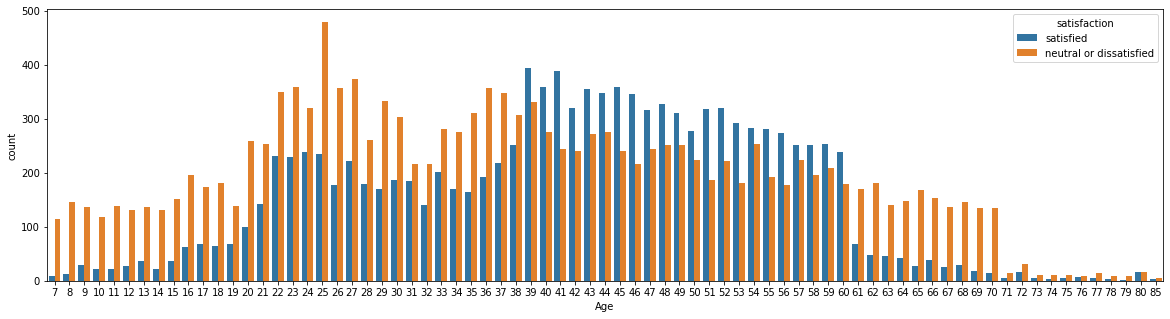

In [32]:
plt.figure(figsize=(20,5))
sns.countplot(df['Age'], hue=df['satisfaction'])

the age 38 and 60 are the ones who are satisfied with their travel.

<AxesSubplot:xlabel='Age', ylabel='count'>

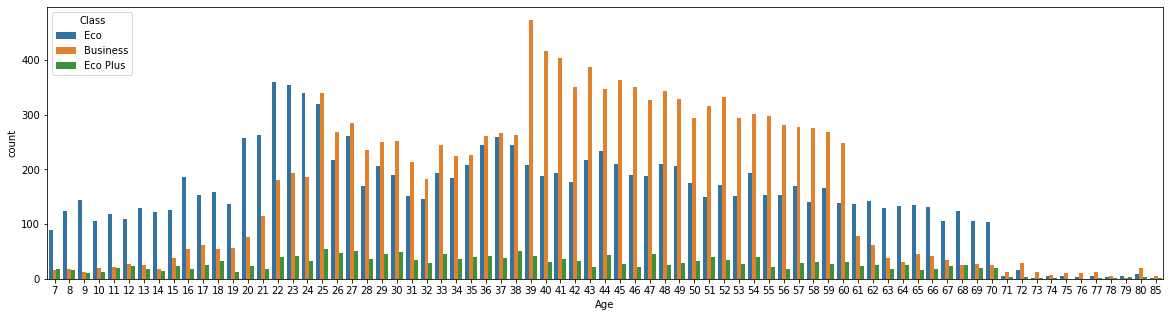

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(df['Age'], hue=df['Class'])

the people from the age 25 to 60, prefer to travel in Business Class.

<AxesSubplot:xlabel='Age', ylabel='count'>

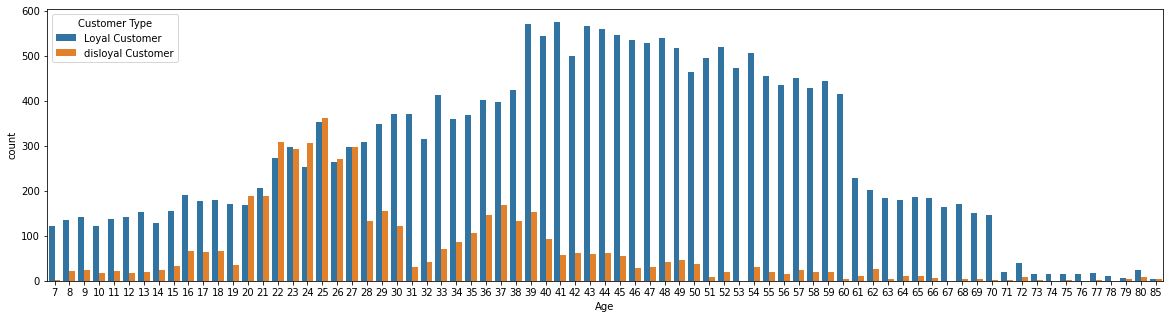

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(df['Age'], hue=df['Customer Type'])

In [35]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


# Feature Engineering

Label Encoding

In [36]:
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i]=encoder[i].fit_transform(df[i])

In [37]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [38]:
for i in df.columns:
    df[i] = df[i].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender                             25976 non-null  int32
 1   Customer Type                      25976 non-null  int32
 2   Age                                25976 non-null  int32
 3   Type of Travel                     25976 non-null  int32
 4   Class                              25976 non-null  int32
 5   Flight Distance                    25976 non-null  int32
 6   Inflight wifi service              25976 non-null  int32
 7   Departure/Arrival time convenient  25976 non-null  int32
 8   Ease of Online booking             25976 non-null  int32
 9   Gate location                      25976 non-null  int32
 10  Food and drink                     25976 non-null  int32
 11  Online boarding                    25976 non-null  int32
 12  Seat comfort      

In [40]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20,1


<AxesSubplot:>

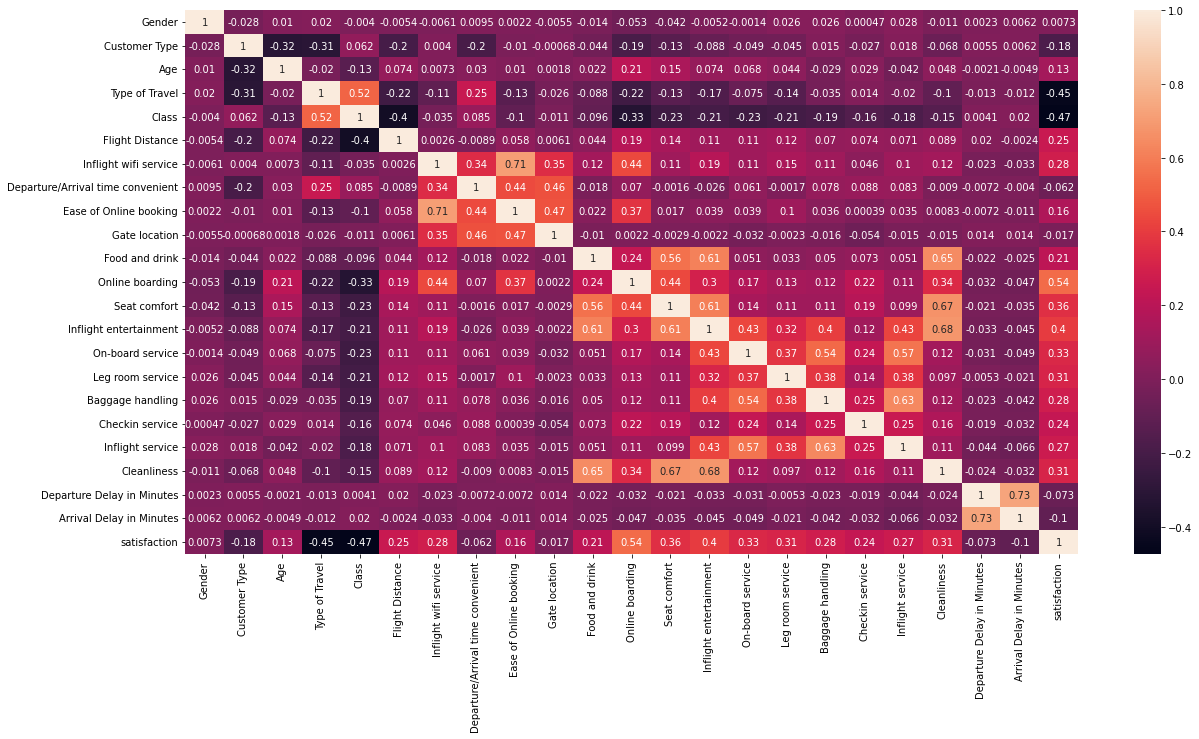

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method='spearman'),annot=True)